Temperature Forecast Project using ML
Problem Statement:

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [3]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
#pd.set_option('display.max_columns',None)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Observation: imported the Dataset in dataframe using csv file format. Displaying only first 5 records with .head function. 

In [5]:
df.shape

(7752, 25)

Observation: We can see that there are 7752 rows and 25 columns in the imported dataset. 

In [6]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Obervation: We can observe that there is only one date column as object column. All other columns are of float type. 

In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Observation: We can see that there are null values in almost all the columns.

<AxesSubplot:>

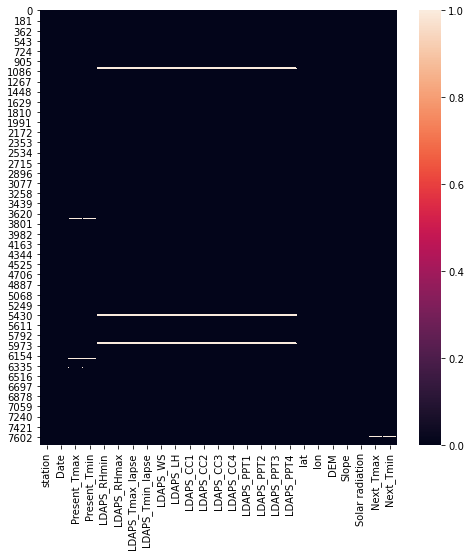

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

Observation: Above is the heat map representation of the null values in which non black colors are null representations in columns. let fix this or remove this null values first. 

In [9]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Observation: We can notice that there is imbalance in the row counts of all the columns. Mean and Medians are some what nearer to each other for most of the columns. Scaling difference is there since SolarRadiation scale is of higher ranges when compared with othet columns. Max and min values are some what with min difference ranges. 

# Feature Extraction:

In [10]:
df["Date"]=pd.to_datetime(df["Date"])

In [11]:
df['day']=df['Date'].dt.day
df['month']=df['Date'].dt.month

In [12]:
df['Date'].isnull().sum()

2

# Replacing Null Values:

In [13]:
df_median=df.copy()

In [14]:
df_median.station.fillna(df_median.station.median(), inplace = True)
df_median.Present_Tmax.fillna(df_median.Present_Tmax.median(), inplace = True)
df_median.Present_Tmin.fillna(df_median.Present_Tmin.median(), inplace = True)
df_median.LDAPS_RHmin.fillna(df_median.LDAPS_RHmin.median(), inplace = True)
df_median.LDAPS_RHmax.fillna(df_median.LDAPS_RHmax.median(), inplace = True)
df_median.LDAPS_Tmax_lapse.fillna(df_median.LDAPS_Tmax_lapse.median(), inplace = True)
df_median.LDAPS_Tmin_lapse.fillna(df_median.LDAPS_Tmin_lapse.median(), inplace = True)
df_median.LDAPS_WS.fillna(df_median.LDAPS_WS.median(), inplace = True)
df_median.LDAPS_LH.fillna(df_median.LDAPS_LH.median(), inplace = True)
df_median.LDAPS_CC1.fillna(df_median.LDAPS_CC1.median(), inplace = True)
df_median.LDAPS_CC2.fillna(df_median.LDAPS_CC2.median(), inplace = True)
df_median.LDAPS_CC3.fillna(df_median.LDAPS_CC3.median(), inplace = True)
df_median.LDAPS_CC4.fillna(df_median.LDAPS_CC4.median(), inplace = True)
df_median.LDAPS_PPT1.fillna(df_median.LDAPS_PPT1.median(), inplace = True)
df_median.LDAPS_PPT2.fillna(df_median.LDAPS_PPT2.median(), inplace = True)
df_median.LDAPS_PPT3.fillna(df_median.LDAPS_PPT3.median(), inplace = True)
df_median.LDAPS_PPT4.fillna(df_median.LDAPS_PPT4.median(), inplace = True)
df_median.lat.fillna(df_median.lat.median(), inplace = True)
df_median.lon.fillna(df_median.lon.median(), inplace = True)
df_median.DEM.fillna(df_median.DEM.median(), inplace = True)
df_median.Slope.fillna(df_median.Slope.median(), inplace = True)
df_median['Solar radiation'].fillna(df_median['Solar radiation'].median(), inplace = True)
df_median.Next_Tmax.fillna(df_median.Next_Tmax.median(), inplace = True)
df_median.Next_Tmin.fillna(df_median.Next_Tmin.median(), inplace = True)
df_median.day.fillna(df_median.day.median(), inplace = True)
df_median.month.fillna(df_median.month.median(), inplace = True)

Observation: Replacing the null values which is present in almost all columns in above bolck of code. Lets check in below step whether it has been removed or not.null_columns =['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'] for i in null_columns: df_n.fillna(df_n[i].median(),axis=1,inplace=True) 

In [15]:
df_median.drop(['Date'],axis=1,inplace=True)

Observation: After feature extraction of the Date column in to other 2 columns of day and month, lets drop the original object 'Date' column as not required. 

In [16]:
df_median.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
day                 0
month               0
dtype: int64

In [17]:
df_median[df_median.isnull().any(axis=1)]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month


Observation: We can notice that there is no null values as all have been replaced with median values of respective columns. 

In [18]:
df_median.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.769401,23.226638,56.742728,88.388529,29.614317,23.514984,7.092549,62.450457,0.368260,...,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.275671,22.932804,16.370872,7.080624
std,7.210637,2.956583,2.403093,14.597945,7.158471,2.932911,2.334099,2.173913,33.571540,0.261236,...,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.122585,2.483296,8.240270,2.238075
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,7.000000,1.000000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,8.000000,7.000000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,16.000000,7.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,24.000000,8.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,31.000000,12.000000


Observation: We can see that the counts of all columns have been equalized as null values removed in all columns. 

# EDA:

Uniariate Analysis:

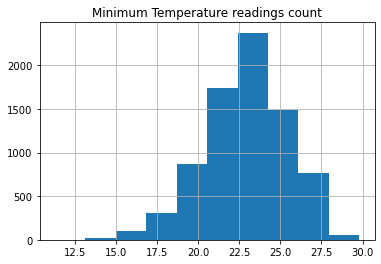

In [19]:
df["Next_Tmin"].hist(grid=True)
plt.title("Minimum Temperature readings count")
plt.show()

Observation: Above graph show that higher counts of temperatures are in the range of 22.5 to 25 c 

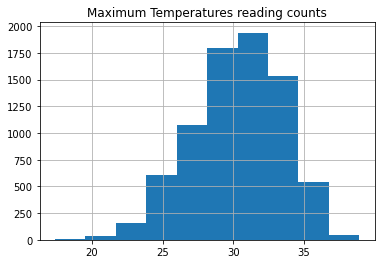

In [20]:
df["Next_Tmax"].hist(grid=True)
plt.title("Maximum Temperatures reading counts")
plt.show()

Observation: Next_max temperatures count seem to have high counts (almost over 1800 counts in between)in the range of 28 to 33 c. 

<AxesSubplot:xlabel='lat', ylabel='count'>

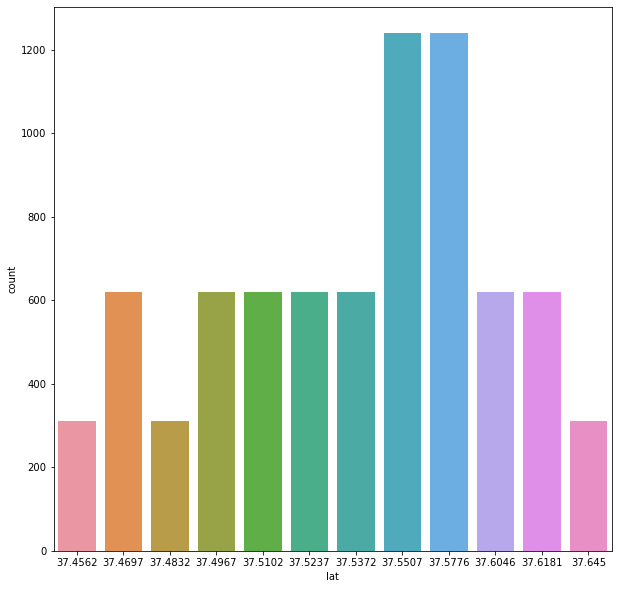

In [21]:
plt.subplots(figsize=(10,10))
sns.countplot(x='lat',data=df_median)

Observation: The counts of readings in the specific Latitude (37.5507 & 37.5776) seems to be high in counts 

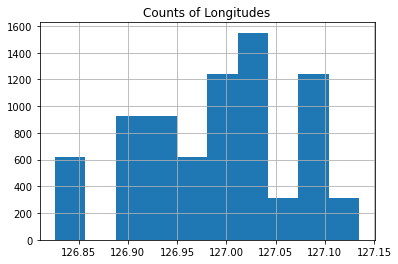

In [22]:
df["lon"].hist(grid=True)
plt.title("Counts of Longitudes")
plt.show()

Observation: For Longitude (between points 127.00 to 127.05) has the higest count which is near to 1500 and all other readings of longitudes are less than this.Mininum count is up to 300 for 127.15 lonitudes. 

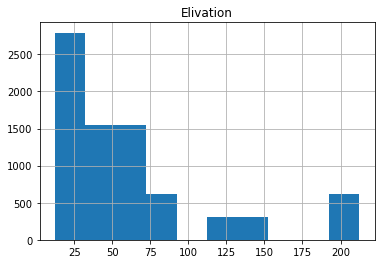

In [23]:
df["DEM"].hist(grid=True)
plt.title("Elivation")
plt.show()

Observation: The Elivation ranges are in between 12.4 to 212.3 

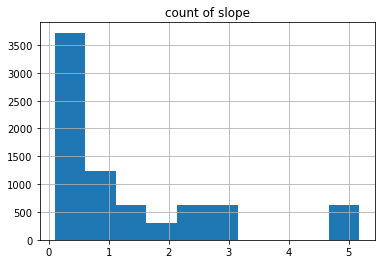

In [24]:
df["Slope"].hist(grid=True)
plt.title("count of slope")
plt.show()

Observation: Ranges of slope is between 0.1 to 5.2 A. Higher counts seems to be in minimun ranges of 0.1 to 0.5 A. 

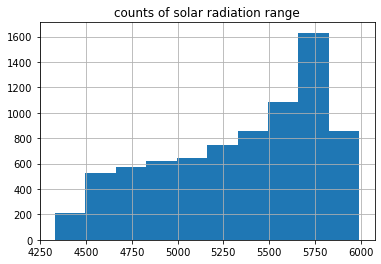

In [25]:
df["Solar radiation"].hist(grid=True)
plt.title("counts of solar radiation range")
plt.show()

Observation: Daily incoming solar radiation (wh/m2) range is in between : 4329.5 to 5992.9. Highest counts are to be in the range of 5750 wh/m2. Less counts in between 4300 to 4500 wh/m2. 

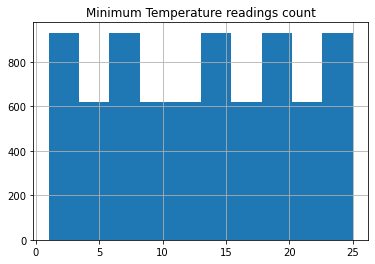

In [26]:
df["station"].hist(grid=True)
plt.title("Minimum Temperature readings count")
plt.show()

Observation: Observation shows that there are 25 Wheather stations used for recordings. Min count is near 600 and max count is above 900 counts. 

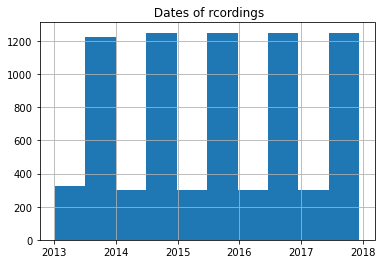

In [27]:
df["Date"].hist(grid=True)
plt.title(" Dates of rcordings")
plt.show()

Observation: For the Present day recordings of all the years from 2013 till 2018 the counts seems to be normalized between ranges of min 300 and max 1200 counts. 

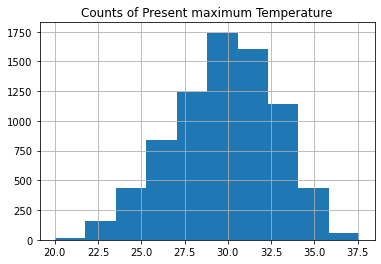

In [28]:
df["Present_Tmax"].hist(grid=True)
plt.title("Counts of Present maximum Temperature")
plt.show()

Observation: Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6. The highest count is near 1750 numbers for air temperatures between 29 to 31 Â°C. 

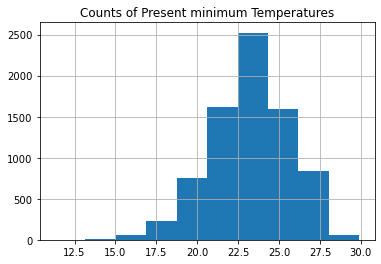

In [29]:
df["Present_Tmin"].hist(grid=True)
plt.title("Counts of Present minimum Temperatures")
plt.show()

Observation: Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9. The The minimum air temperature recorded are highest counts upto 2500 in the tempetature ranges between 22.5 to 24 Â°C. 

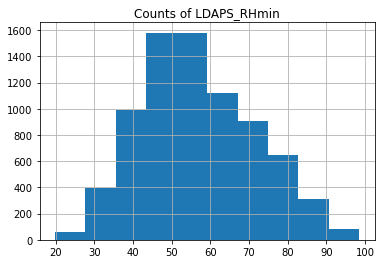

In [30]:
df["LDAPS_RHmin"].hist(grid=True)
plt.title("Counts of LDAPS_RHmin")
plt.show()

Observation: LDAPS model forecast of next-day minimum relative humidity (%) in between: 19.8 to 98.5. Highest count is near 1600 numbers for the humidity percentages of 45 to 60. 

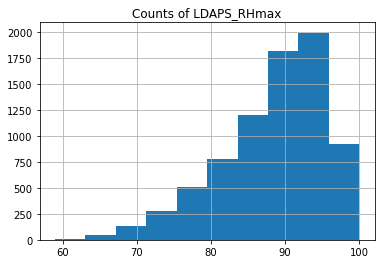

In [31]:
df["LDAPS_RHmax"].hist(grid=True)
plt.title("Counts of LDAPS_RHmax")
plt.show()

Observation: LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100. Highest count is up to 2000 counts for the relative humidity %'s between 92 to 96 

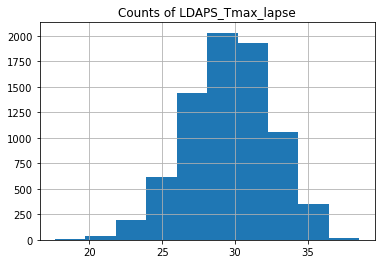

In [32]:
df["LDAPS_Tmax_lapse"].hist(grid=True)
plt.title("Counts of LDAPS_Tmax_lapse")
plt.show()

Observation: LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5. Highest counts is upto 2000 for the air temperatures in between 27 to 30(Â°C) 

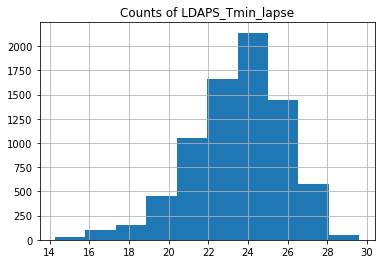

In [33]:
df["LDAPS_Tmin_lapse"].hist(grid=True)
plt.title("Counts of LDAPS_Tmin_lapse")
plt.show()

Observation: LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6. We can notice the highest counts is above 2000 for the air temperatures between 23.5 to 25 (Â°C). 

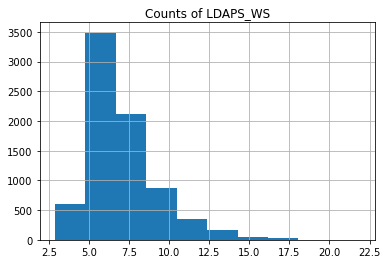

In [34]:
df["LDAPS_WS"].hist(grid=True)
plt.title("Counts of LDAPS_WS")
plt.show()

Observation: LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9. Wind speeds in the range of 5.0 to 6.8 seem to have high counts of about 3500. 

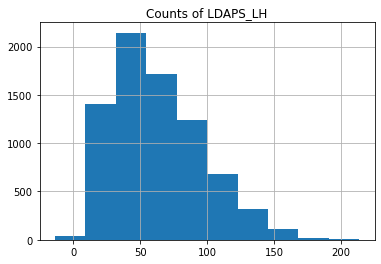

In [35]:
df["LDAPS_LH"].hist(grid=True)
plt.title("Counts of LDAPS_LH")
plt.show()

Observation: LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4. More number of counts is above 2000 for average latent flux of range 45 to 60(W/m2). 

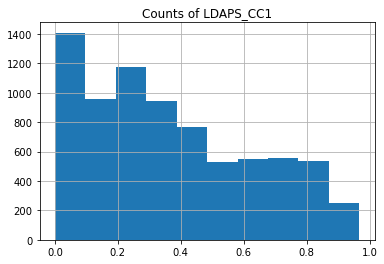

In [36]:
df["LDAPS_CC1"].hist(grid=True)
plt.title("Counts of LDAPS_CC1")
plt.show()

Observation: LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97. Higher counts is 1400 for cloud cover of range 0.0 to 0.1. lowest counts is near 200 for cloud cover of range 0.9 to 1.0. 

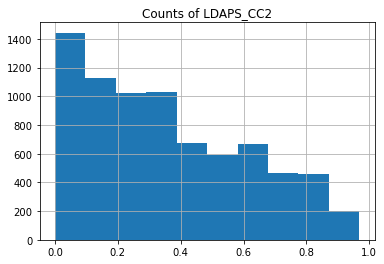

In [37]:
df["LDAPS_CC2"].hist(grid=True)
plt.title("Counts of LDAPS_CC2")
plt.show()

Observation: LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97. Next dat 2nd 6 hour split avg cloud cover of range 0.0 to 0.1 is having higher counts. 

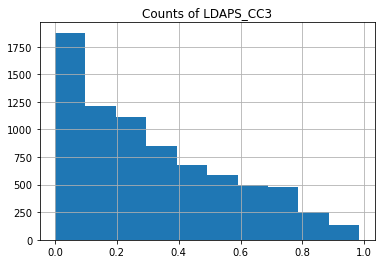

In [38]:
df["LDAPS_CC3"].hist(grid=True)
plt.title("Counts of LDAPS_CC3")
plt.show()

Observation: LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98. 3rd 6 hour reading of avg cloud cover in the range of 0.0 to 0.1 is higher counts of above 1750 records. 

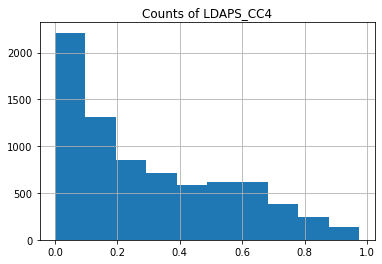

In [39]:
df["LDAPS_CC4"].hist(grid=True)
plt.title("Counts of LDAPS_CC4")
plt.show()

Observation: LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97. 4th 6-hour avg cloud cover of range 0.0 to 0.1 is having the higest counts of readings. 

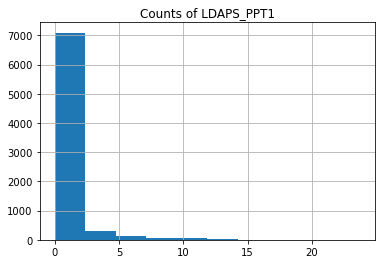

In [40]:
df["LDAPS_PPT1"].hist(grid=True)
plt.title("Counts of LDAPS_PPT1")
plt.show()

Observation: LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7. Maximum number of precipitaion recored in the range of 0 to 2.5. 

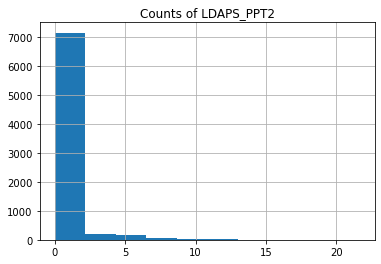

In [41]:
df["LDAPS_PPT2"].hist(grid=True)
plt.title("Counts of LDAPS_PPT2")
plt.show()

Observation: LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6. next-day 2nd 6-hour split average precipitation of range 0 to 2.5 has more number of recordings above 7000. 

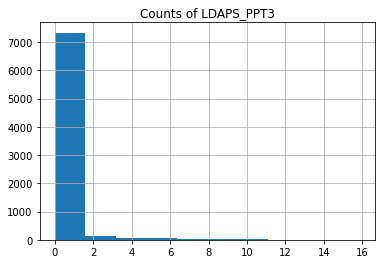

In [42]:
df["LDAPS_PPT3"].hist(grid=True)
plt.title("Counts of LDAPS_PPT3")
plt.show()

Observation: LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8. next-day 3rd 6-hour split average precipitation percentage between 0 to 1.8 seem to have high records above 7000 counts 

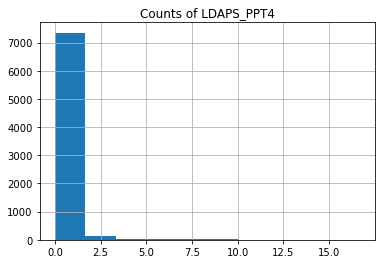

In [43]:
df["LDAPS_PPT4"].hist(grid=True)
plt.title("Counts of LDAPS_PPT4")
plt.show()

Obseravtion: LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7. next-day 4th 6-hour split average precipitation of percent 0 to 2 seems to have high counts above 7000 records. 

In [44]:
corr_mat=df_median.corr()
corr_mat

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month
station,1.000000e+00,0.112582,0.131525,-0.066729,-0.166953,0.069107,0.104753,0.005275,-0.133339,0.006917,...,-0.010399,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107900,0.128216,3.183538e-17,-2.342460e-17
Present_Tmax,1.125819e-01,1.000000,0.618769,-0.205341,-0.300261,0.570287,0.624229,-0.123565,0.134216,-0.313176,...,-0.101118,-0.052659,0.008990,-0.187138,-0.105884,-0.025401,0.610256,0.622700,-1.437949e-01,-1.159627e-03
Present_Tmin,1.315245e-01,0.618769,1.000000,0.121800,-0.012659,0.464420,0.764239,-0.037682,-0.011331,0.082000,...,-0.065550,-0.078547,-0.043509,-0.250299,-0.146460,0.053638,0.471723,0.796657,-1.082454e-01,-3.443475e-03
LDAPS_RHmin,-6.672872e-02,-0.205341,0.121800,1.000000,0.578770,-0.564575,0.089346,0.294537,-0.070654,0.613885,...,0.168797,0.087093,-0.076232,0.102108,0.123736,0.244643,-0.439171,0.094061,-6.629070e-02,-5.457641e-02
LDAPS_RHmax,-1.669531e-01,-0.300261,-0.012659,0.578770,1.000000,-0.373274,-0.113914,0.134786,0.238183,0.436097,...,0.117376,0.195761,0.025662,0.177134,0.219557,0.148259,-0.281282,-0.070193,-1.222295e-02,-3.889740e-02
LDAPS_Tmax_lapse,6.910687e-02,0.570287,0.464420,-0.564575,-0.373274,1.000000,0.654013,-0.311973,0.047954,-0.438410,...,-0.160300,-0.042093,0.090665,-0.178895,-0.162332,0.047820,0.827473,0.587066,-1.601958e-01,-2.151881e-02
LDAPS_Tmin_lapse,1.047525e-01,0.624229,0.764239,0.089346,-0.113914,0.654013,1.000000,-0.130245,-0.134906,0.010691,...,-0.094855,-0.096252,-0.026700,-0.195445,-0.185839,0.159445,0.588224,0.881074,-1.775265e-01,-2.691354e-02
LDAPS_WS,5.275379e-03,-0.123565,-0.037682,0.294537,0.134786,-0.311973,-0.130245,1.000000,0.007115,0.289792,...,0.144550,0.036646,-0.059448,0.190995,0.171577,0.122966,-0.345578,-0.098730,-3.013374e-02,-8.265652e-02
LDAPS_LH,-1.333385e-01,0.134216,-0.011331,-0.070654,0.238183,0.047954,-0.134906,0.007115,1.000000,-0.146920,...,0.020332,0.133203,0.025819,0.055126,0.086770,-0.046553,0.155684,-0.056832,-1.275628e-02,-2.366484e-02
LDAPS_CC1,6.917419e-03,-0.313176,0.082000,0.613885,0.436097,-0.438410,0.010691,0.289792,-0.146920,1.000000,...,0.092119,-0.008129,-0.006842,-0.014087,-0.020747,0.219264,-0.454771,-0.012732,-2.092459e-02,-7.736128e-02


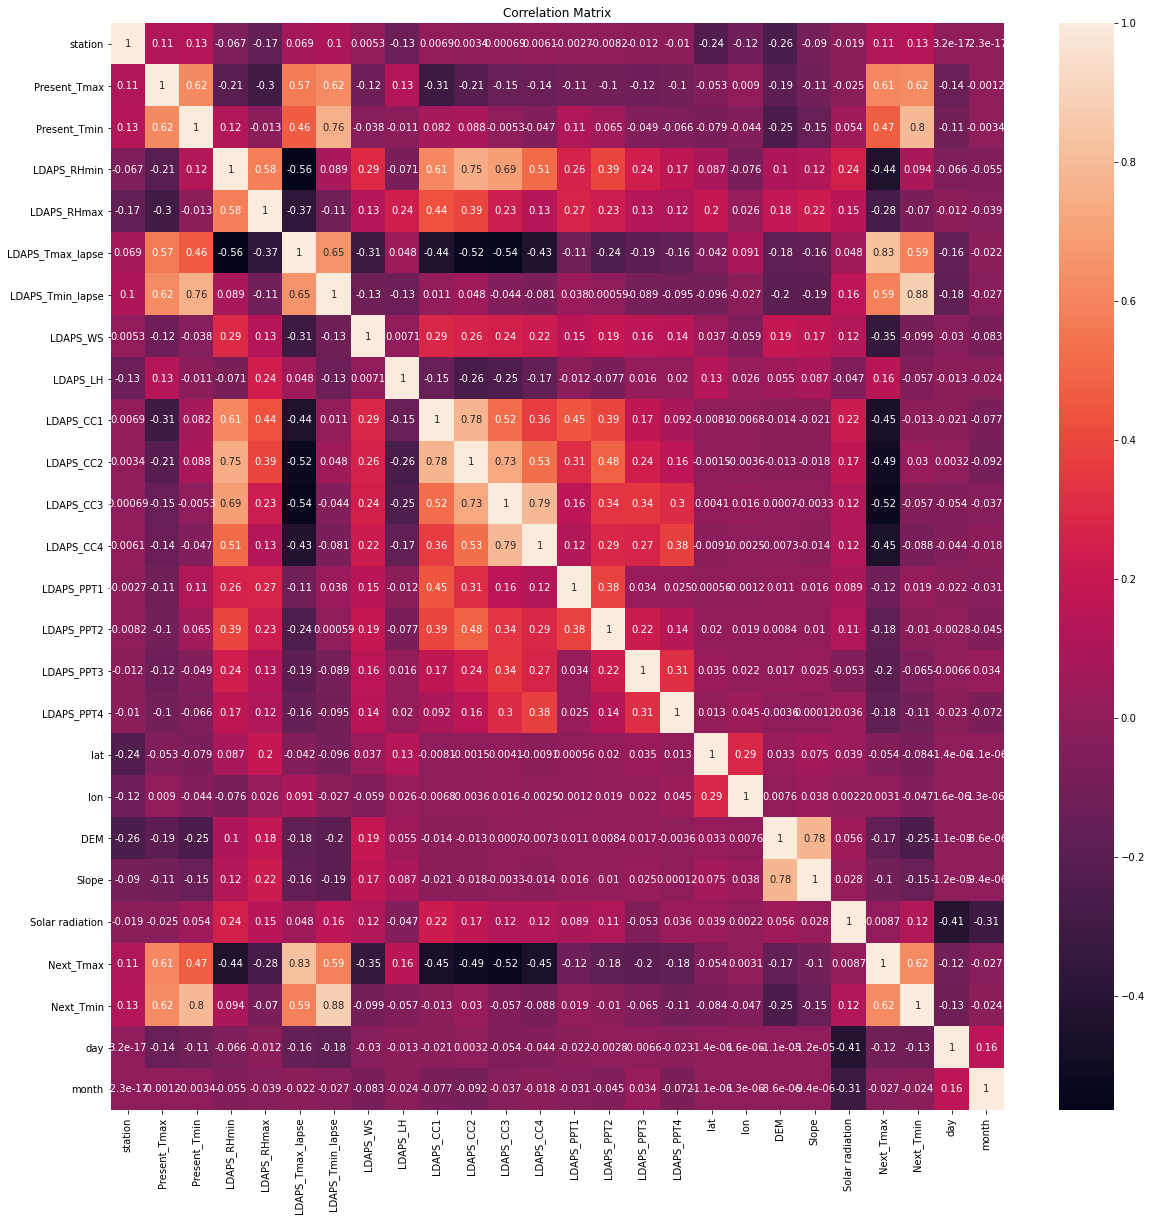

In [45]:
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

Observation: Next_Tmax is more highly negatively corretated with many other columns when compased with Next_Tmin. We could notice that Next_Tmax is corretated with LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4 and LDAPS_RHmin,LDAPS_ws. Also we can notice that other columns apart from target variables some other columns have intercorrelation betwen eachothers. #sns.pairplot(df,palette='bright') 

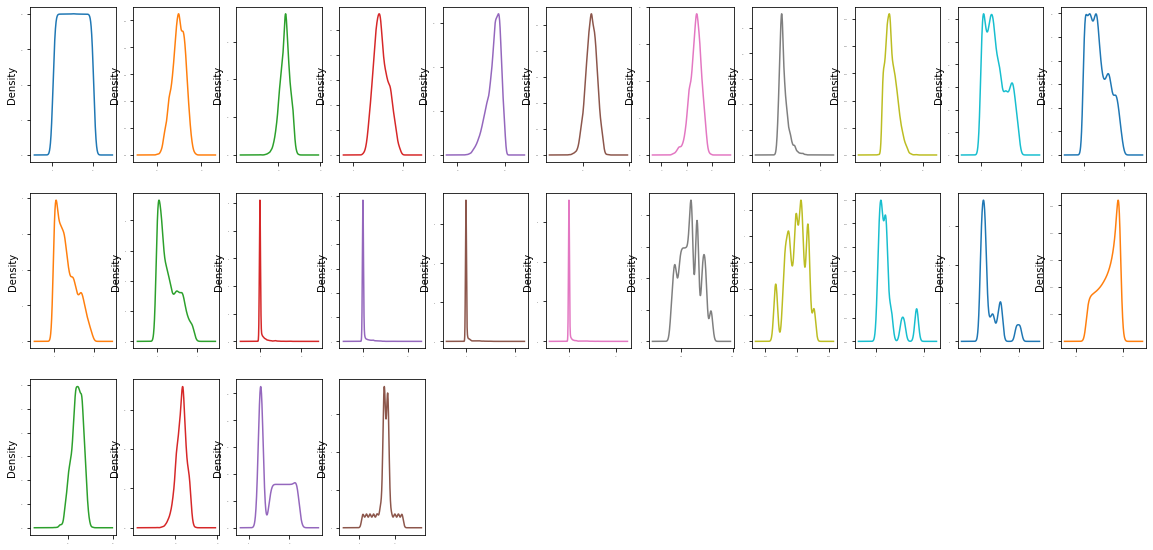

In [46]:
df_median.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False,fontsize=1,figsize=(20,20))
plt.show()

Observation: The above distribution plots show that there are skewness in modt of the columns. Lets rty to remove the skewness in below steps. 

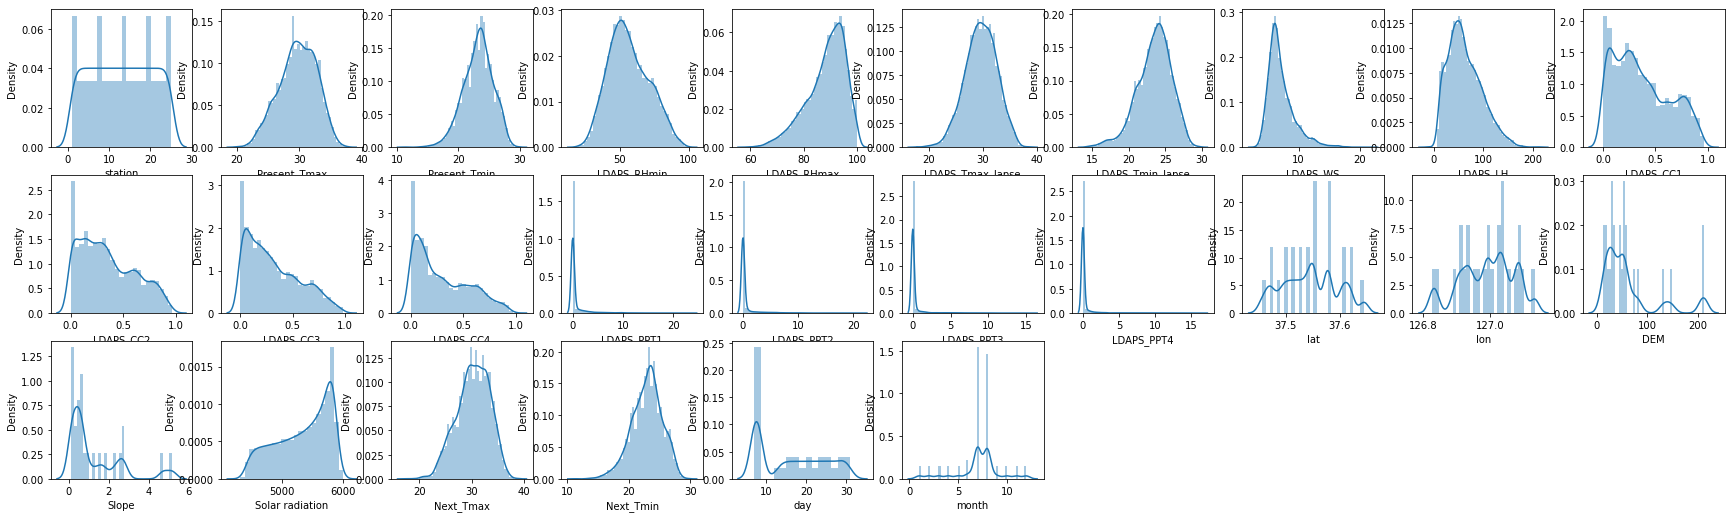

In [47]:
collist=df_median.columns.values
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(df[collist[i]])

Observation: Almost all the columns have skewness. some columns like LDAPSRHmax,SolarRadiation,Next_Tmin have left skewness. some columns like LDAPSCC1,LDAPSCC2,LDAPSCC3,LDAPSCC4 have righ skewness. 

# Label encoding:

As almost all the columns are in float type we need not have to do encoding and replace the values. So lets proceed with the actual data processed above code blocks.

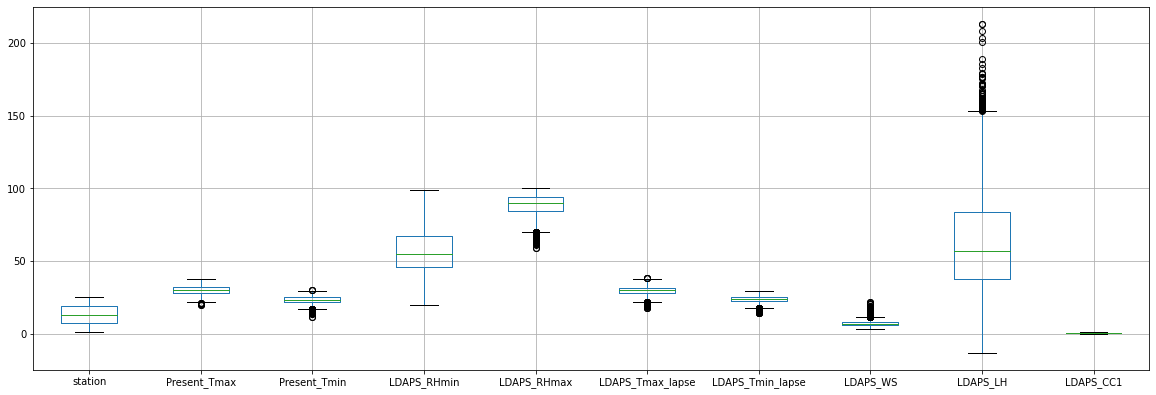

In [48]:
df_median.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

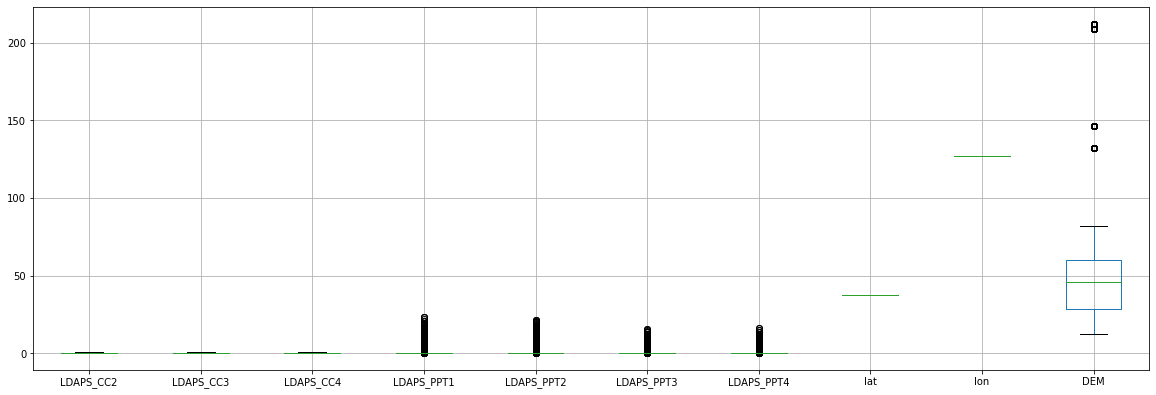

In [49]:
df_median.iloc[:,10:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

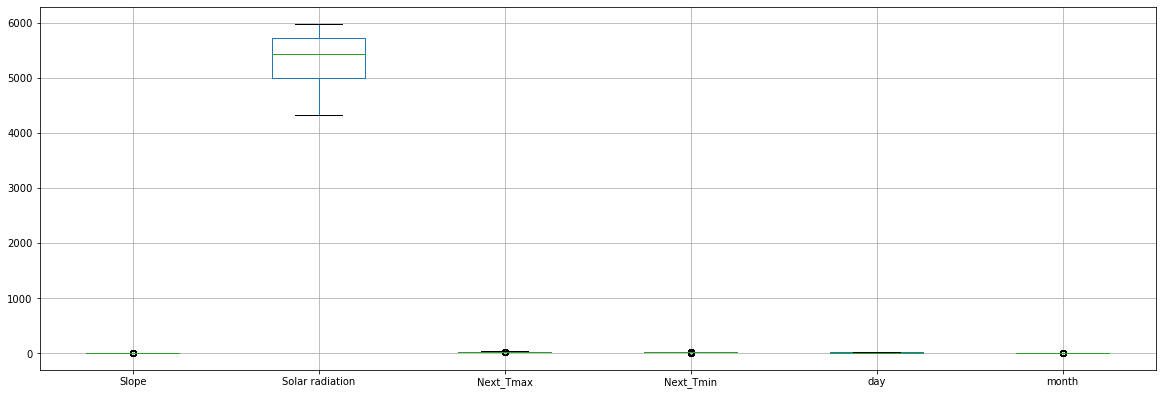

In [50]:
df_median.iloc[:,20:30].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Observation: From the above Box plots we can notice that there are some Outliers. But lets check by Z score method and check further more checking process

# Outlier Removal:

In [51]:
from scipy.stats import zscore
z=np.abs(zscore(df_median))
df_zscore=df_median[(z<3).all(axis=1)]

In [52]:
df_zscore.shape

(6894, 26)

In [53]:
df_median.shape

(7752, 26)

In [54]:
((7752-6894)/7752)*100

11.06811145510836

Observation: The above method sho that the data loss is of upto 11% big loss of data. So lets proceed without removal by Zscore. 


Feature selection:
MultiOutput method:

As we have 2 output variables "Next_Tmax","Next_Tmin" lets take both columns in Y variable as some models support for multiple output. So that we can predict for both columns.

In [55]:
x=df_median.drop(columns=["Next_Tmax","Next_Tmin"])
y=df_median[["Next_Tmax","Next_Tmin"]]

Observation: We split the dataframe into x and y variables for model building for split of train and test records. 

In [56]:
y.shape , x.shape, df_median.shape

((7752, 2), (7752, 24), (7752, 26))

# Skewness Removal:

In [57]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [58]:
x=df_skew

# Scaling:

In [59]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
x=ss.transform(x)
x=pd.DataFrame(x)

Observation: Scaling metod has bee applid since to avoid the scaler difference of min and max values between columns. 

# Checking for Best Random_State:

In [60]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=(r2_score(y_test,pred))
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)

Best accuracy is   0.8173754388558143   at random_state: 160


Observation: Fron above code block we have obtained the best random stae for which it give good accuracy score. 

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=maxRS)

In [62]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6201, 24), (1551, 24), (6201, 2), (1551, 2))

Observatin: Train test split method has been applied for x,y variables so as to split the records for train and test so as to apply in the model buildings below. 

# Model Building:

In [63]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Coefficient : ",lm.coef_)
print("Intercept   : ",lm.intercept_)
print("Score       : ",lm.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[ 1.88786661e-01  5.25801363e-01  1.97300760e-01  4.75036892e-01
   2.45297494e-02  1.96678554e+00 -1.21318904e-02 -2.84530017e-01
   1.95853939e-01 -7.53207280e-02 -1.54284168e-01 -1.55626939e-01
  -3.45088517e-01 -1.90884784e-01 -7.15501116e-02 -1.03641807e-01
   4.49496199e-02  2.77555756e-17 -1.40738207e-01  2.29388062e-02
  -1.55325828e-02  5.01034604e-02  7.50132705e-02 -9.57080825e-02]
 [ 3.15932646e-02  2.34426773e-01  6.04218588e-01  3.61445193e-01
   1.76288348e-01  5.06417185e-01  1.16979126e+00  9.50733735e-02
  -1.34342654e-02  5.75675570e-02  1.31000504e-01 -2.85572022e-03
   4.22305644e-02 -1.64100586e-01 -1.65319893e-01 -3.56163292e-02
  -1.22613531e-01  2.77555756e-17 -1.68713406e-02 -3.03513468e-01
   1.42527662e-01  6.96398967e-02  1.26848538e-01  3.47134755e-03]]
Intercept   :  [30.26761184 22.92411444]
Score       :  0.7901330162232532
 
error
Mean absolute error    : 0.9495772466404138
Mean squared error     : 1.591100550829105
Root mean squared er

In [64]:
ls=Lasso(alpha=0.0001) 
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print("Coefficient : ",ls.coef_)
print("Intercept   : ",ls.intercept_)
print("Score       : ",ls.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[ 0.18852264  0.52540997  0.19687671  0.47365374  0.02456909  1.96543429
  -0.01041758 -0.28441125  0.19604289 -0.07547623 -0.15425546 -0.15550906
  -0.34484785 -0.19064054 -0.07144225 -0.10342072  0.04466994  0.
  -0.14055908  0.02221204 -0.01481473  0.05001936  0.07476351 -0.09562438]
 [ 0.03158507  0.23397486  0.60437828  0.36100725  0.17607892  0.50586056
   1.17028379  0.09489854 -0.01320053  0.05709648  0.13069924 -0.00203727
   0.04162285 -0.1637135  -0.16503842 -0.03569324 -0.12239202  0.
  -0.01682505 -0.30304665  0.1421187   0.06952424  0.12661837  0.00334363]]
Intercept   :  [30.26760223 22.92411809]
Score       :  0.7901329254829861
 
error
Mean absolute error    : 0.9495541891638521
Mean squared error     : 1.5910568827719618
Root mean squared error: 1.2613710329526209
 
r2 score :  0.8173817110861767


In [65]:
rd=Ridge(alpha=0.0001)# to minimize the coefficient varience
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
rd.score(x_train,y_train)
print("Coefficient : ",rd.coef_)
print("Intercept   : ",rd.intercept_)
print("Score       : ",rd.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[ 0.18878665  0.52580133  0.19730076  0.47503672  0.02452977  1.96678529
  -0.01213169 -0.28453003  0.19585395 -0.07532076 -0.15428418 -0.15562695
  -0.3450885  -0.19088476 -0.07155011 -0.1036418   0.04494963  0.
  -0.14073819  0.0229388  -0.01553257  0.05010348  0.07501326 -0.09570808]
 [ 0.03159327  0.23442679  0.6042186   0.3614452   0.17628834  0.5064172
   1.16979121  0.09507337 -0.01343427  0.05756756  0.1310005  -0.00285572
   0.04223056 -0.16410058 -0.16531989 -0.03561633 -0.12261353  0.
  -0.01687134 -0.30351345  0.14252764  0.06963989  0.12684853  0.00347135]]
Intercept   :  [30.26761184 22.92411444]
Score       :  0.7901330162232532
 
error
Mean absolute error    : 0.9495772461706762
Mean squared error     : 1.5911005499663473
Root mean squared error: 1.2613883422508498
 
r2 score :  0.8173754388819999


In [66]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rf.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",rf.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9853696611990704
 
error
Mean absolute error    : 0.6676444229529337
Mean squared error     : 0.7827218023855579
Root mean squared error: 0.8847156618855336
 
r2 score :  0.907081921294815


In [67]:
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
kn.score(x_train,y_train)
print("Score       : ",kn.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9159727519186633
 
error
Mean absolute error    : 0.7246421663442935
Mean squared error     : 0.9442968407479064
Root mean squared error: 0.9717493713648115
 
r2 score :  0.8873654647487095


In [68]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
dt.score(x_train,y_train)
print("Score       : ",dt.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  1.0
 
error
Mean absolute error    : 0.9600257898130233
Mean squared error     : 1.6928046421663416
Root mean squared error: 1.301078261353383
 
r2 score :  0.7956838855205315


# Predicting Multiple Output:

In [69]:
#Predict the multiple column output value
pred=rf.predict(x_test)
print("Predicted Temperature with 2 output : ","\n", pred )
print("Actual Temperature with 2 output :","\n", y_test)

Predicted Temperature with 2 output :  
 [[26.763 21.813]
 [32.822 24.691]
 [23.698 16.997]
 ...
 [26.102 21.372]
 [29.877 20.363]
 [29.42  23.745]]
Actual Temperature with 2 output : 
       Next_Tmax  Next_Tmin
6269       27.8       21.5
1752       33.3       24.6
6154       25.4       17.0
7689       23.1       16.4
5032       23.5       19.6
...         ...        ...
5560       35.3       25.9
835        33.0       26.3
4659       26.7       21.8
3058       30.0       20.1
7563       28.7       23.4

[1551 rows x 2 columns]


Observation: We can notic that there is 2 columns predicted from above code block. which is minimum and maximum temperatures after prediction. 

# Cross Validation score checking:

In [70]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=maxRS)
scr=cross_val_score(lm,x,y,cv=cv,scoring='r2')
print("Cross Validation Score of LinearRegression Model is : ", scr.mean())

Cross Validation Score of LinearRegression Model is :  0.7939572061330136


In [71]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=maxRS)
scr=cross_val_score(ls,x,y,cv=cv)
print("Cross Validation Score of Lasso Model is : ", scr.mean())

Cross Validation Score of Lasso Model is :  0.7939607238599143


In [72]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=maxRS)
scr=cross_val_score(rd,x,y,cv=cv)
print("Cross Validation Score of RidgeRegression Model is : ", scr.mean())

Cross Validation Score of RidgeRegression Model is :  0.7939572062028575


In [73]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=maxRS)
scr=cross_val_score(rf,x,y,cv=cv)
print("Cross Validation Score of RandomForestRegressor Model is : ", scr.mean())

Cross Validation Score of RandomForestRegressor Model is :  0.9022341508320049


In [74]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=maxRS)
scr=cross_val_score(kn,x,y,cv=cv)
print("Cross Validation Score of KNeighborsRegressor Model is : ", scr.mean())

Cross Validation Score of KNeighborsRegressor Model is :  0.8776026526867764


In [75]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=maxRS)
scr=cross_val_score(dt,x,y,cv=cv)
print("Cross Validation Score of DecisionTreeRegressor Model is : ", scr.mean())

Cross Validation Score of DecisionTreeRegressor Model is :  0.7730095897403866


MODEL ACCURACY R2_SCORE CROSSVALIDATION DIFFERENCE LR 0.79 0.81 0.79 0.02 LASSO 0.79 0.81 0.79 0.02 RIDGE 0.79 0.81 0.79 0.02 RF 0.98 0.9 0.9 0 KN 0.91 0.88 0.87 0.01 DT 0.1 0.79 0.77 0.02 Observation: The above table of comparision shows that the minimum differenc betwee CV and r2_score is with Random Forest Regressor model. So lets select that model for further Tuining so as to improve the accuracy by parameter tunings. 

# Parameter Tuning:

Random Forest Regressor

In [76]:
parameters={"bootstrap":[True,False], "criterion":["mse", "mae"],}

In [77]:
gcv=GridSearchCV(RandomForestRegressor(), parameters,cv=5,scoring='r2') #Tuning

In [78]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae']},
             scoring='r2')

In [79]:
gcv.best_params_

{'bootstrap': True, 'criterion': 'mse'}

In [80]:
mod=RandomForestRegressor(bootstrap= True, criterion='mse',random_state=maxRS)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

90.67243911120717


Observation: From the above tuning we can see that Rando Forest Regressor has 91% best performance, good accuracy and r2_score.

# Saving the Model:

In [81]:
import joblib
joblib.dump(mod,"min_max_temp.pkl")

['min_max_temp.pkl']

In [82]:
mod=joblib.load("min_max_temp.pkl")

In [83]:
prediction=mod.predict(x_test)

In [84]:
print(r2_score(y_test,prediction)*100)

90.67243911120717


In [85]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [86]:
prediction.to_csv('min_max_temp.csv') #Saving the predictions

In [87]:
prediction

,0,1
0,26.377,21.695
1,32.904,24.659
2,23.651,17.028
3,24.734,18.121
4,23.522,19.916
...,...,...
1546,35.595,26.397
1547,32.270,25.970
1548,26.185,21.617
1549,29.930,20.416


# Conclusion & Observation:

Hence we have got Best accuracy with Random Forest Regressor model. We have saved and loaded that for checking purpose and predicted in above steps.
